# K-média

## 1. Preparações do ambiente

In [1]:
# Importando bibliotecas utilizadas
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from math import sqrt, pow

%matplotlib inline


In [ ]:
# Lendo o conjunto de dados
df1 = pd.read_csv('datasets/c2ds1-2sp.txt', sep='\t', index_col='sample_label')
df1.head()

,d1,d2
sample_label,,
c2sp1s1,10.500000,9.000000
c2sp1s2,10.567170,9.268445
c2sp1s3,8.275320,11.382210
c2sp1s4,8.227458,11.377640
c2sp1s5,8.179511,11.372110


In [ ]:
df2 = pd.read_csv('datasets/c2ds3-2g.txt', sep='\t', index_col='sample_label')
df2.head()

,d1,d2
sample_label,,
c2g1s1,8.809783,7.611147
c2g1s2,4.110747,11.103186
c2g1s3,4.114710,11.039587
c2g1s4,3.154736,6.743244
c2g1s5,5.972931,7.537982


In [ ]:
df3 = pd.read_csv('datasets/monkey.txt', sep='\t', index_col='sample_label')
df3.columns = ['d1', 'd2']
df3.head()

,d1,d2
sample_label,,
monkeyc1g1s1,8.809783,7.611147
monkeyc1g1s2,4.110747,11.103186
monkeyc1g1s3,4.114710,11.039587
monkeyc1g1s4,3.154736,6.743244
monkeyc1g1s5,5.972931,7.537982


## 2. K-médias

### 2.1 Pseudo código elaborado

``` python 
def Kmedias(dataset, k, num_iters):
    centroides = centroides_aleatorios(teste, k)
    lista_centroides = []
    for i in range(num_iters):
        // Definindo qual centroid mais próximo
        for j in range(numero_de_objetos):
            centroide = centroide_mais_proximo(objeto, centroides)
            lista_centroides.append(centroide)
        
        centroides = recalcular_centroides()
    
    teste["centroide"] = lista_centroides
    teste.drop(axis='columns', labels=['d1', 'd2'])
```



### 2.2 Algoritmo

In [ ]:
def centroides_aleatorios(dataset, k):
    atrib1_max = dataset["d1"].max()
    atrib1_min = dataset["d1"].min()
    
    atrib2_max = dataset["d2"].max()
    atrib2_min = dataset["d2"].min()
    
    clusters = []
    for i in range(k):
        a1 = random.uniform(atrib1_min, atrib1_max)
        a2 = random.uniform(atrib2_min, atrib2_max)
        
        clusters.append([a1, a2])

    return clusters

In [ ]:
#Distancia Euclidiana
def distEuclidiana(p, centroide):
    distancia = sqrt(pow((p[0] - centroide[0]), 2) + pow((p[1] - centroide[1]), 2))
    return distancia

In [ ]:
def centroides_mais_proximos(d1, d2, centroides, numero_de_objetos):
    lista_centroides = []
    for i in range(numero_de_objetos):
        centroide = centroide_mais_proximo([d1[i], d2[i]], centroides)
        lista_centroides.append(centroide)
    
    return lista_centroides

In [ ]:
def centroide_mais_proximo(objeto, centroides):
    menor_dist = distEuclidiana(objeto, centroides[0])
    index = 0
    for i in range(1, len(centroides)):
        nova_dist = distEuclidiana(objeto, centroides[i])
        if nova_dist < menor_dist:
            menor_dist = nova_dist
            index = i
    
    return index

In [ ]:
def recalcular_centroides(dataset, k):
    novos_centroides = []
    for i in range(k):
        qtd_obj = len(dataset.query(f'centroide == {i}'))
        d1 = dataset.query(f'centroide == {i}')['d1'].sum()
        d2 = dataset.query(f'centroide == {i}')['d2'].sum()
        
        d1 /= qtd_obj
        d2 /= qtd_obj
        
        novos_centroides.append([d1, d2])
    
    return novos_centroides

In [ ]:
def kmedias(dataset, k, numero_de_iteracoes):
    centroides = centroides_aleatorios(dataset, k)
    lista_centroides = []
    numero_de_objetos = len(dataset)
    
    for i in range(numero_de_iteracoes):
        lista_centroides = centroides_mais_proximos(dataset["d1"], dataset["d2"], centroides, numero_de_objetos)
        
        dataset['centroide'] = lista_centroides
        centroides = recalcular_centroides(dataset, k)
        
    return [dataset, centroides]

### 2.3. Resultados

### Dataset 1

In [ ]:
df_test, centroides = kmedias(df1, 3, 10)

In [ ]:
df_test.head()

,d1,d2,centroide
sample_label,,,
c2sp1s1,10.500000,9.000000,1
c2sp1s2,10.567170,9.268445,1
c2sp1s3,8.275320,11.382210,2
c2sp1s4,8.227458,11.377640,2
c2sp1s5,8.179511,11.372110,2


In [ ]:
df_test['centroide'].value_counts()

0    245
3    199
2    191
1    188
4    177
Name: centroide, dtype: int64

In [ ]:
centroides

[[10.83083336, 11.586042512653062],
 [6.198258760638296, 12.201597180851063],
 [9.027710784293195, 5.229154397905758],
 [5.833841507537688, 7.9347177824120605],
 [12.971446101694916, 7.286677885310734]]

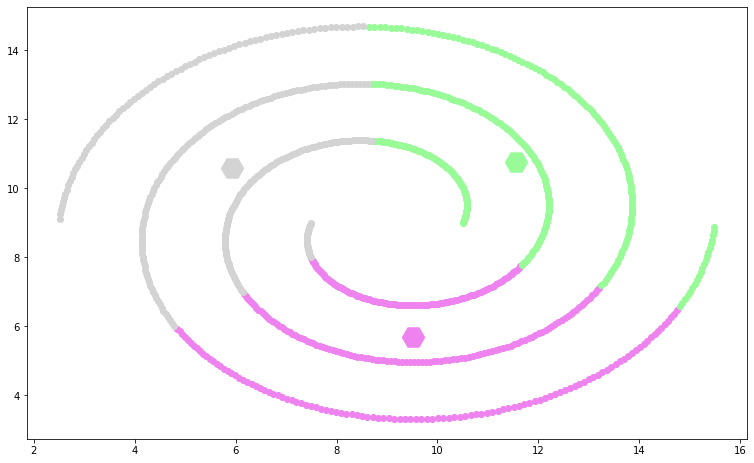

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])

cores = {0: "violet", 1: "palegreen", 2: "lightgray",
        3: "bisque", 4: "lime"}

for i in range(len(centroides)):
        temp = df_test.query(f'centroide == {i}')
        plt.scatter(x=temp.d1, y=temp.d2, color=cores[i])
        plt.scatter(x=centroides[i][0], y=centroides[i][1], color=cores[i],
                   marker='H', s=500)
        


plt.show()

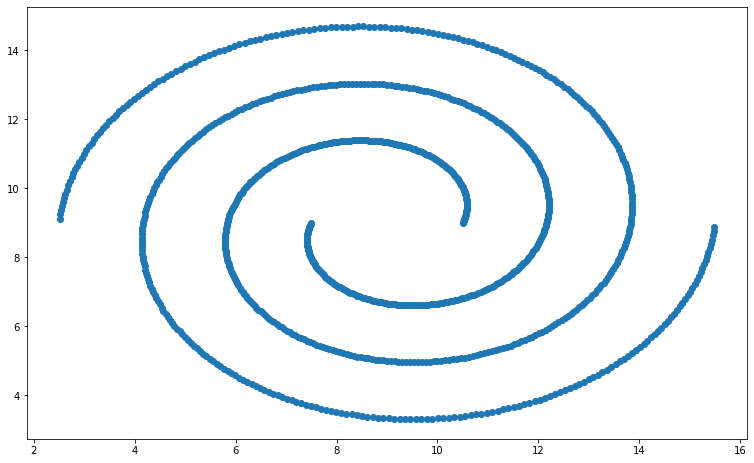

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])

plt.scatter(x=df_test.d1, y=df_test.d2)

### Dataset 2

In [ ]:
df_test, centroides = kmedias(df2, 3, 5)

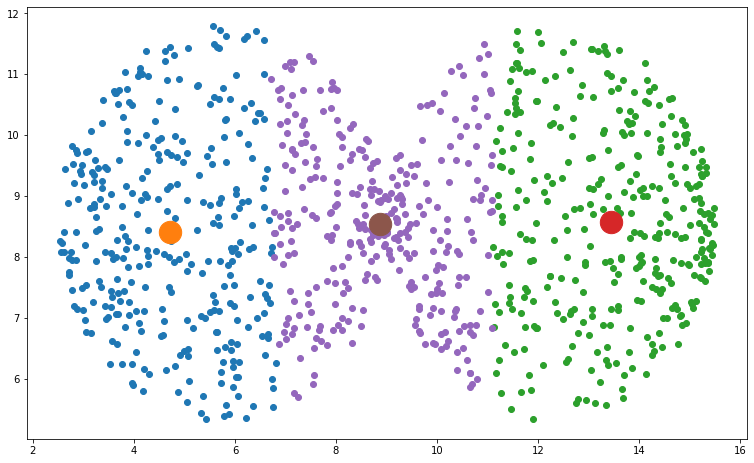

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])



for i in range(len(centroides)):
        temp = df2.query(f'centroide == {i}')
        plt.scatter(x=temp.d1, y=temp.d2)
        plt.scatter(x=centroides[i][0], y=centroides[i][1],
                   marker='o', s=500)
        


plt.show()

### Monkey

In [ ]:
df_test, centroides = kmedias(df3, 5, 5)

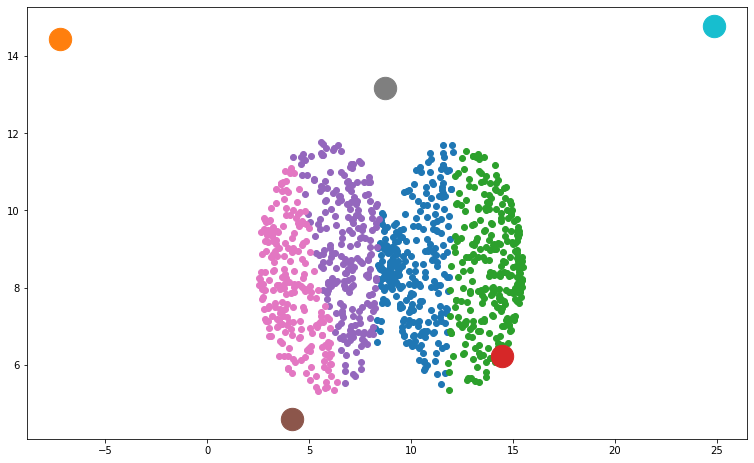

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])



for i in range(len(centroides)):
        temp = df2.query(f'centroide == {i}')
        plt.scatter(x=temp.d1, y=temp.d2)
        plt.scatter(x=centroides[i][0], y=centroides[i][1],
                   marker='o', s=500)
        


plt.show()